<a href="https://colab.research.google.com/github/JacquelineGiPe/Bootcamp-DS-Proyecto-DS/blob/main/Salary_in_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


**NumPy**: para cálculos numéricos con arreglos multidimensionales.




**Pandas**: para análisis y manipulación de datos tabulares.**texto en negrita**

**Position**: Numerical identifier for each job listing.
**Job Title**: Title of the job position.
**Company Name**: Name of the hiring company.
**Location**: Job location, including city and state.
**Salary**: Estimated salary range for the position.
**Date**: Date the job was posted or updated.
**Logo**: URL of the company's logo.
**Job Link**: Direct link to the job posting on Glassdoor.
**Company Rating**: Average rating of the company on Glassdoor.

In [ ]:
df = pd.read_csv('Data-Science-Job_Listing.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Position        500 non-null    int64  
 1   Job Title       500 non-null    object 
 2   Company Name    500 non-null    object 
 3   Location        500 non-null    object 
 4   Salary          438 non-null    object 
 5   Date            500 non-null    object 
 6   Logo            436 non-null    object 
 7   Job Link        500 non-null    object 
 8   Company Rating  439 non-null    float64
dtypes: float64(1), int64(1), object(7)
memory usage: 35.3+ KB


In [ ]:
df.describe()

,Position,Company Rating
count,500.000000,439.000000
mean,250.500000,3.812301
std,144.481833,0.480281
min,1.000000,1.000000
25%,125.750000,3.600000
50%,250.500000,3.800000
75%,375.250000,4.000000
max,500.000000,5.000000


In [ ]:
df.head()

,Position,Job Title,Company Name,Location,Salary,Date,Logo,Job Link,Company Rating
0,1,Associate Stop Loss Underwriter,The Insurance Center\n2.7,"Onalaska, WI",$57K - $84K (Glassdoor est.),30d+,https://media.glassdoor.com/sql/453835/the-ins...,https://www.glassdoor.com/partner/jobListing.h...,2.7
1,2,Manager of Data Science,"Nuvative, Inc.\n3.4","Wichita, KS",$106K - $157K (Glassdoor est.),30d+,https://media.glassdoor.com/sql/1384674/net-pa...,https://www.glassdoor.com/partner/jobListing.h...,3.4
2,3,Senior Data Product Manager,ProviderTrust\n4.2,"Nashville, TN",$105K - $141K (Glassdoor est.),11d,https://media.glassdoor.com/sql/1953857/hibob-...,https://www.glassdoor.com/partner/jobListing.h...,4.2
3,4,Oncology Nurse Navigator,Inizio Engage\n3.6,"Portland, OR",$90K - $113K (Employer est.),1d,https://media.glassdoor.com/sql/8794153/inizio...,https://www.glassdoor.com/partner/jobListing.h...,3.6
4,5,Head of Artificial Intelligence – Americas Region,Covestro\n3.6,"Pittsburgh, PA",$89K - $148K (Glassdoor est.),30d+,https://media.glassdoor.com/sql/27128/covestro...,https://www.glassdoor.com/partner/jobListing.h...,3.6


In [ ]:
df['Salary']

0                  $57K - $84K (Glassdoor est.)
1                $106K - $157K (Glassdoor est.)
2                $105K - $141K (Glassdoor est.)
3                  $90K - $113K (Employer est.)
4                 $89K - $148K (Glassdoor est.)
                         ...                   
495                                         NaN
496    $44.12 - $70.00 Per Hour (Employer est.)
497                $62K - $107K (Employer est.)
498    $33.00 - $39.00 Per Hour (Employer est.)
499               $140K - $210K (Employer est.)
Name: Salary, Length: 500, dtype: object

In [ ]:
puesto_remoto = df[df['Location'] == 'Remote']
puesto_remoto


251.8780487804878

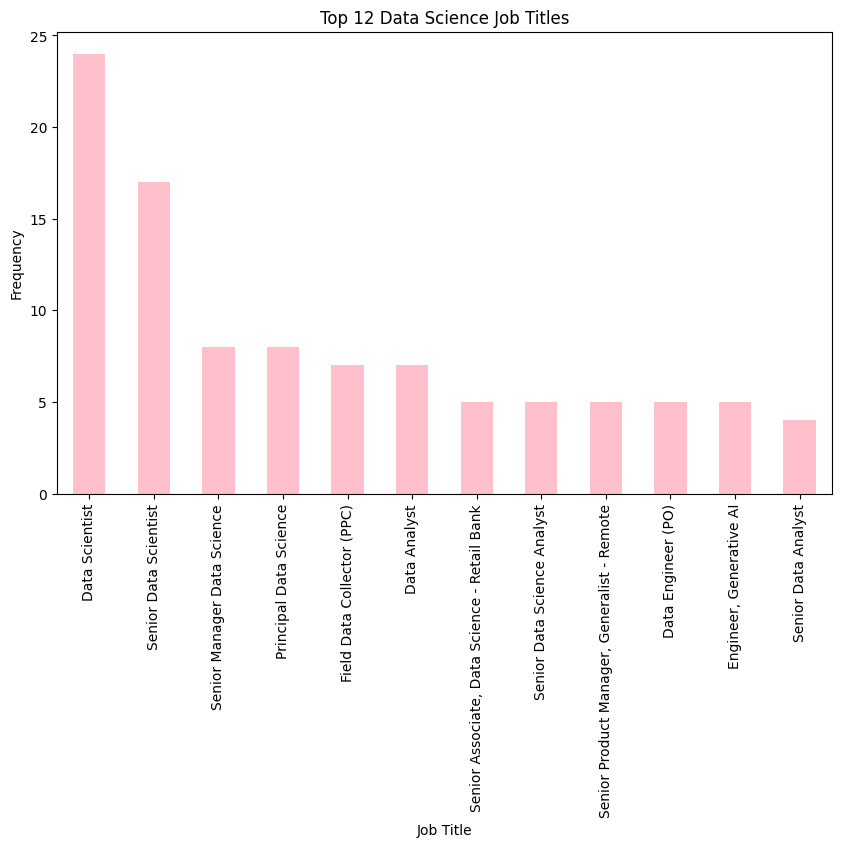

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each job title
job_title_counts = df['Job Title'].value_counts().head(12)    #value_counts()  ordena por freciencia

# Plot the top 10 job titles
plt.figure(figsize=(10,6))  #tamaño de la grafica : (ancho, largo)
job_title_counts.plot(kind='bar', color='pink')
plt.title('Top 12 Data Science Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Frequency')
plt.show()

# Locaciones mas frecuentes

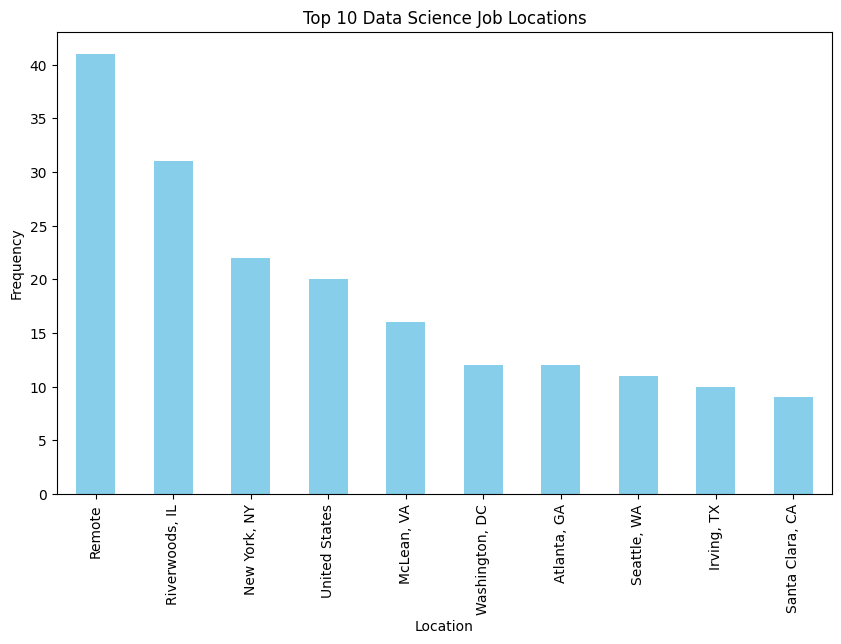

In [ ]:
location = df['Location'].value_counts().head(10)

plt.figure(figsize=(10,6))
location.plot(kind='bar', color='skyblue')
plt.title('Top 10 Data Science Job Locations')
plt.xlabel('Location')
plt.ylabel('Frequency')
plt.show()

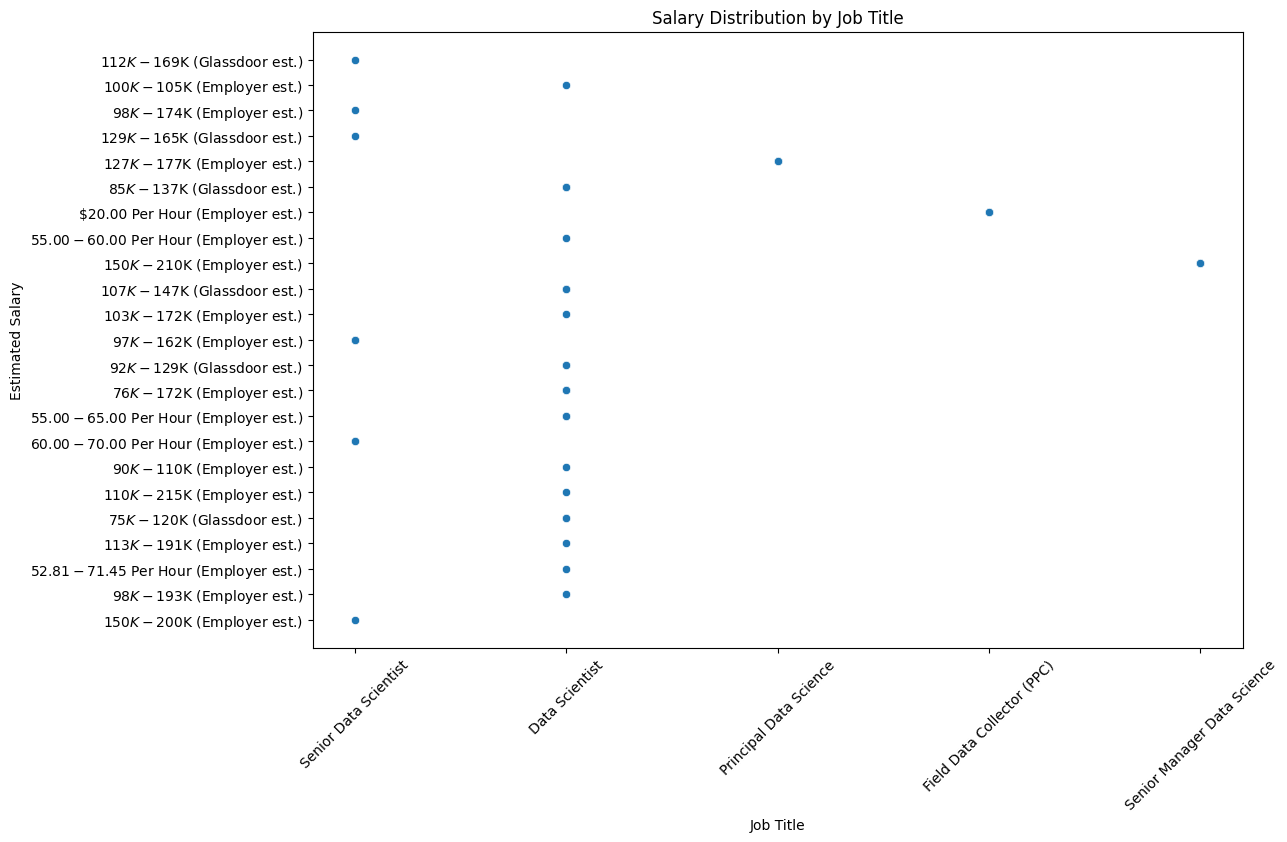

In [ ]:
import seaborn as sns

# Filter dataset to include only job titles with sufficient data
top_titles = df['Job Title'].value_counts().head(5).index
df_filtered = df[df['Job Title'].isin(top_titles)]

# salary distribution by job title
plt.figure(figsize=(12,8))
sns.scatterplot(x='Job Title', y='Salary', data=df_filtered)
plt.title('Salary Distribution by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Estimated Salary')
plt.xticks(rotation=45)
plt.show()

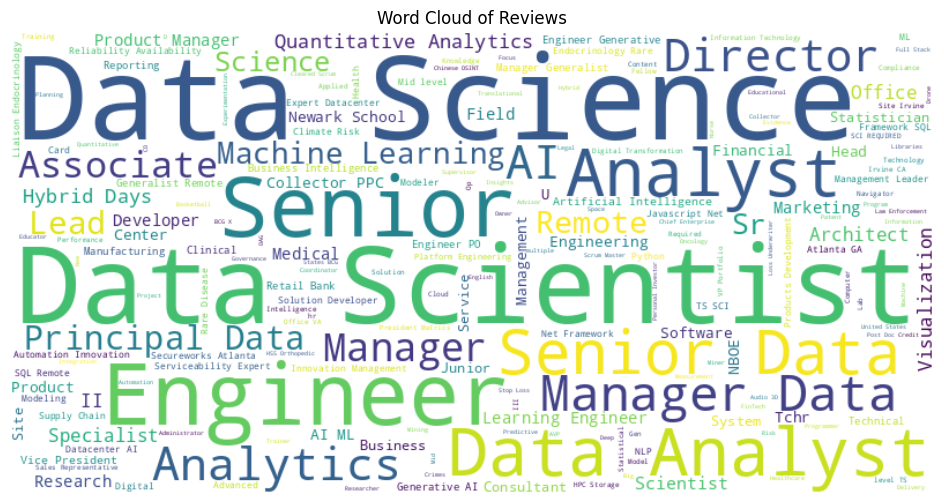

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Ensure all items in the 'NAME_OF_CHANNEL' column are strings
reviews_text = ' '.join(df['Job Title'].dropna().astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(reviews_text)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Reviews')
plt.axis('off')
plt.show()

In [ ]:
import plotly.express as px

for column in ['Position',
 'Job Title',
 'Company Name',
 'Location',
 'Salary',
 'Date',
 'Logo',
 'Job Link',
 'Company Rating']:

    fig = px.histogram(data_frame=df, x=column)
    fig.show()